In [55]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from augmentation import verticalFlip,horizontalFlip,rotate,elasticDeformation,noise
import nibabel as nib

In [8]:
ROOT_DIR = "C:/Users/FYP/Desktop/fyp/"
SLICED_DATA_DIR = ROOT_DIR + "dataset/PLD/sliced_2D/"

In [9]:
def get_data_path(CONFIG_DIR):
  f = open(CONFIG_DIR)
  jdata = json.load(f)
  f.close()
  return jdata["path"]

In [10]:
data = get_data_path(SLICED_DATA_DIR + 'config.json')

In [23]:
# first image, label from orignal image
imagea =np.load(data[8]["image"])
labela =np.load(data[8]["label"])
print(imagea.shape,labela.shape)

(1, 160, 160) (1, 160, 160)


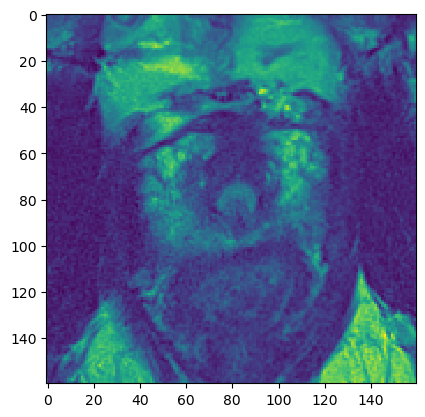

In [33]:
plt.imshow(aug_image, interpolation='nearest')
plt.show()

In [51]:
def applyAug(item, augFun):
    ori_image =np.load(item["image"]).squeeze()
    ori_label =np.load(item["label"]).squeeze()

    nifti_image, nifti_label= augFun(nib.Nifti1Image(ori_image, affine=np.eye(4)), nib.Nifti1Image(ori_label, affine=np.eye(4)))

    aug_image  = np.array( nifti_image.dataobj )
    aug_label = np.array( nifti_label.dataobj )
    

    plt.figure("check", (9, 9))
    plt.subplot(2, 2, 1)
    plt.title("Initial image")
    plt.imshow(ori_image, cmap="gray")
    plt.subplot(2, 2, 2)
    plt.title("Augmented image")
    plt.imshow(aug_image, cmap="gray")
    plt.subplot(2, 2, 3)
    plt.title("Initial label")
    plt.imshow(ori_label)
    plt.subplot(2, 2, 4)
    plt.title("Augmented label")
    plt.imshow(aug_label)
    plt.show()

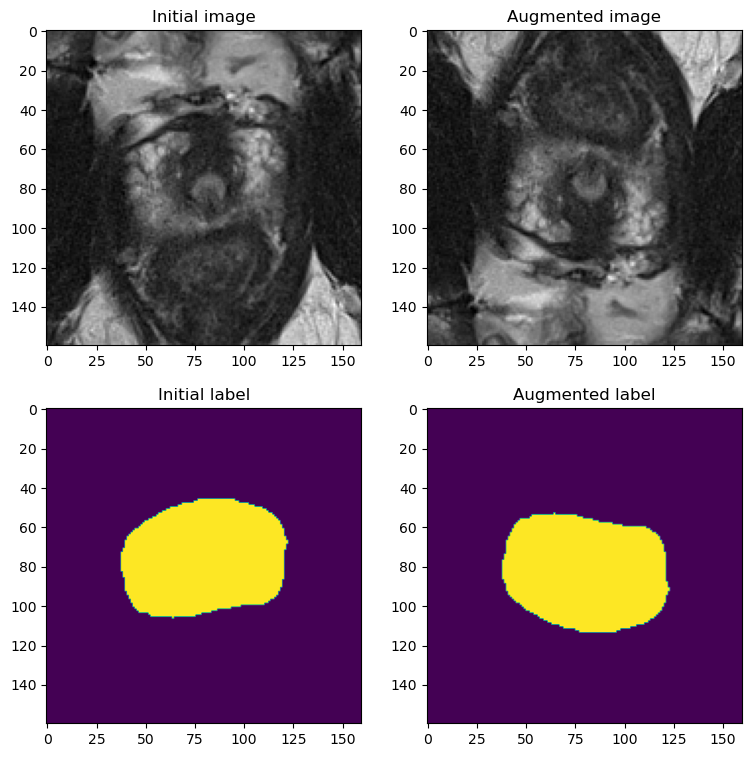

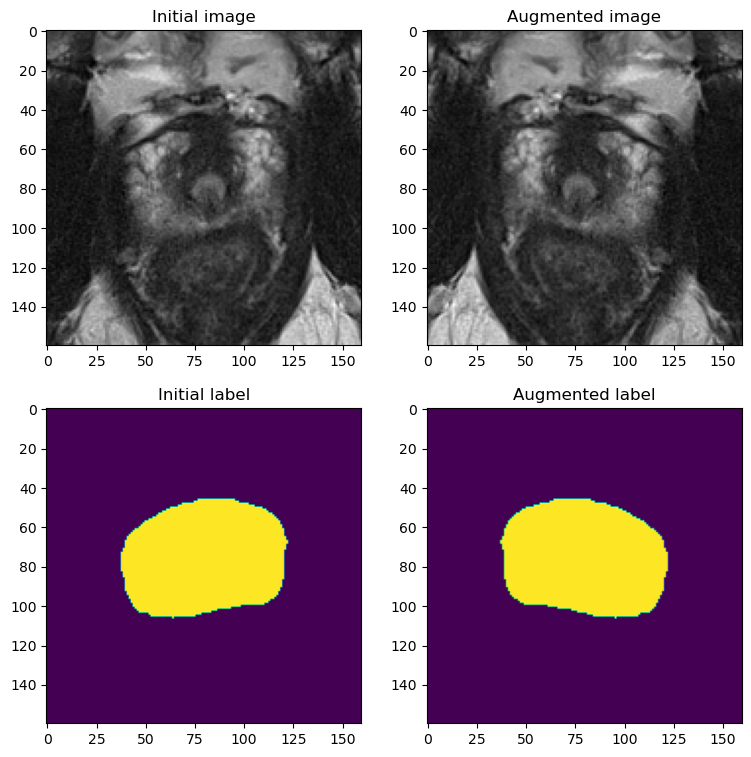

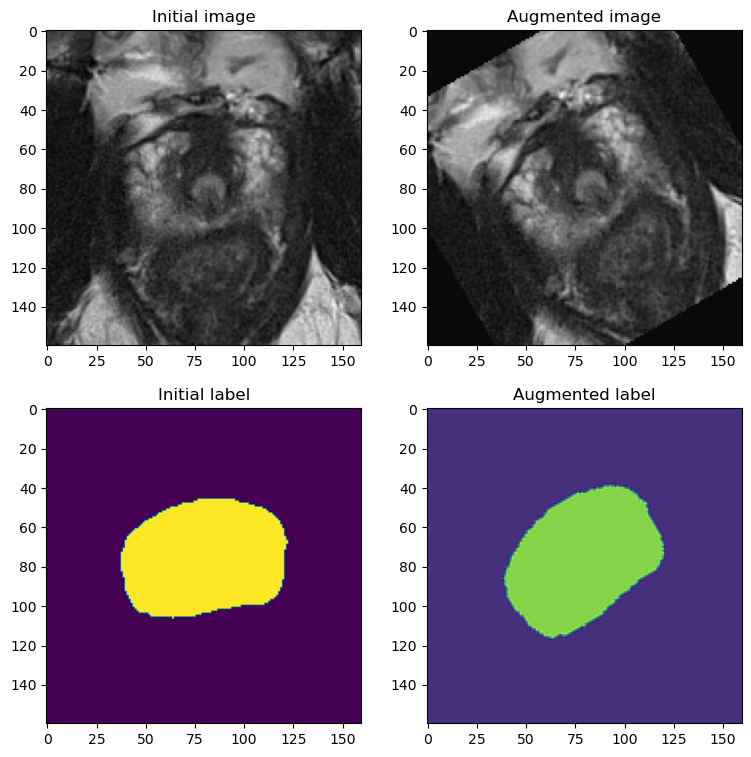

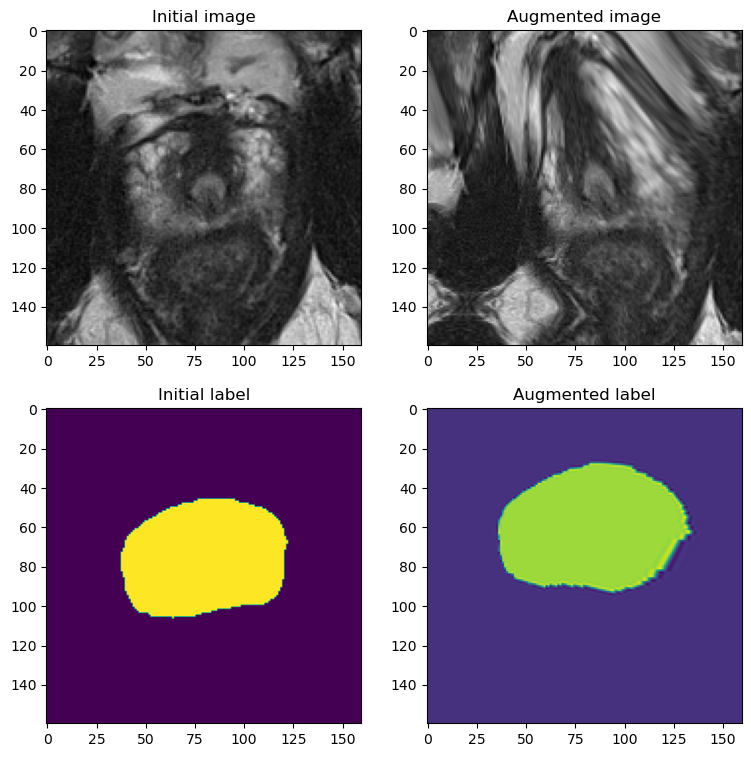

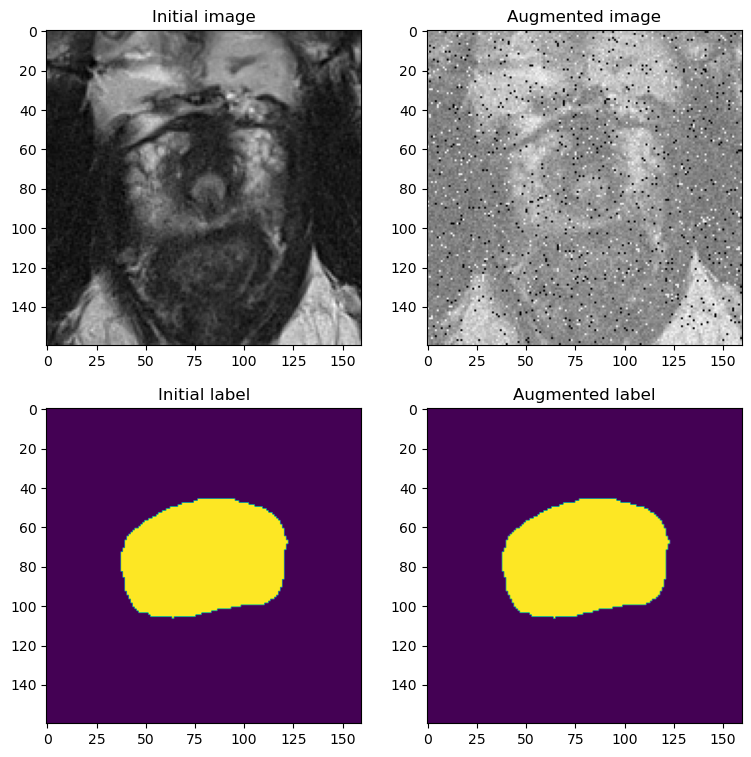

In [56]:
item = data[8]
applyAug(item, verticalFlip)
applyAug(item, horizontalFlip)
applyAug(item, rotate)
applyAug(item, elasticDeformation)
applyAug(item, noise)